In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


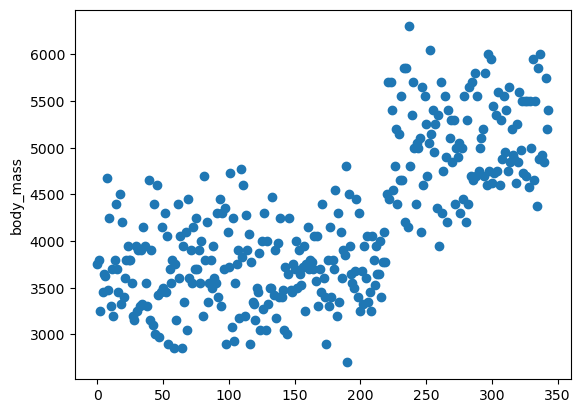

In [5]:
# The x-values are generated using np.arange(len(df["body_mass_g"])), which creates an array of indices 
# corresponding to the length of the "body_mass_g" column. The y-values are taken from the "body_mass_g" column 
# of the DataFrame.

plt.scatter(np.arange(len(df["body_mass_g"])),df["body_mass_g"])
plt.ylabel("body_mass")
plt.show()

In [20]:
print("Gjennomsnitt = ",np.nanmean(df["body_mass_g"]))
print("standard avvik = ", np.nanstd(df["body_mass_g"]) )

Gjennomsnitt =  4201.754385964912
standard avvik =  800.7812292384522


## Skalering

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [21]:
# This line standardizes the "body_mass_g" column using the fit_transform method of the StandardScaler. 
# It first expands the dimensions of the "body_mass_g" column using np.expand_dims because the fit_transform method 
# expects a 2D array, but "body_mass_g" is initially a 1D array. 
# The resulting scaled_body_mass variable contains the standardized values.

scaled_body_mass = scaler.fit_transform(np.expand_dims(df["body_mass_g"],1))

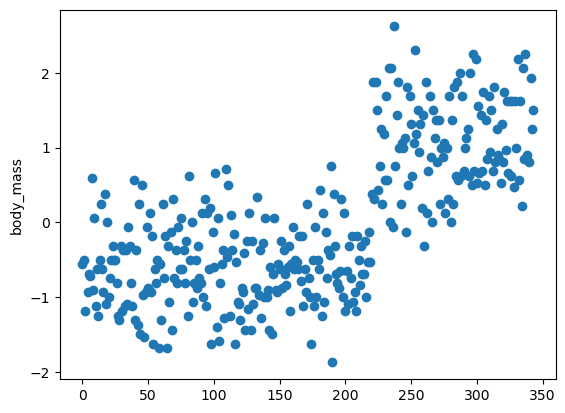

In [10]:
plt.scatter(np.arange(len(scaled_body_mass)),scaled_body_mass)
plt.ylabel("body_mass")
plt.show()

In [22]:
print("Gjennomsnitt = ",np.nanmean(scaled_body_mass))
print("standard avvik = ", np.nanstd(scaled_body_mass))

Gjennomsnitt =  4.15522067695965e-17
standard avvik =  0.9999999999999999


## Kategoriske variabler - string til int

In [12]:
df["sex"].replace(['Female','Male'],[0,1],inplace=True)

## Imputering

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
df.shape

(344, 7)

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    float64
dtypes: float64(5), object(2)
memory usage: 18.9+ KB
None


In [17]:
df.sex

0      1.0
1      0.0
2      0.0
3      NaN
4      0.0
      ... 
339    NaN
340    0.0
341    1.0
342    0.0
343    1.0
Name: sex, Length: 344, dtype: float64

In [18]:
imputer = SimpleImputer(strategy='mean')

In [18]:
imputer.fit_transform(np.expand_dims(df.sex,1))

array([[1.       ],
       [0.       ],
       [0.       ],
       [0.5045045],
       [0.       ],
       [1.       ],
       [0.       ],
       [1.       ],
       [0.5045045],
       [0.5045045],
       [0.5045045],
       [0.5045045],
       [0.       ],
       [1.       ],
       [1.       ],
       [0.       ],
       [0.       ],
       [1.       ],
       [0.       ],
       [1.       ],
       [0.       ],
       [1.       ],
       [0.       ],
       [1.       ],
       [1.       ],
       [0.       ],
       [1.       ],
       [0.       ],
       [0.       ],
       [1.       ],
       [0.       ],
       [1.       ],
       [0.       ],
       [1.       ],
       [0.       ],
       [1.       ],
       [1.       ],
       [0.       ],
       [0.       ],
       [1.       ],
       [0.       ],
       [1.       ],
       [0.       ],
       [1.       ],
       [0.       ],
       [1.       ],
       [1.       ],
       [0.5045045],
       [0.       ],
       [1.       ],


## Sjekk korrelasjon og fjern redundante features

In [34]:
def plot_correlation_matrix(X):
    X_copy = X.copy()
    plt.figure(figsize=(10,10))
    sns.heatmap(X_copy.corr(), annot=True)
    plt.show()

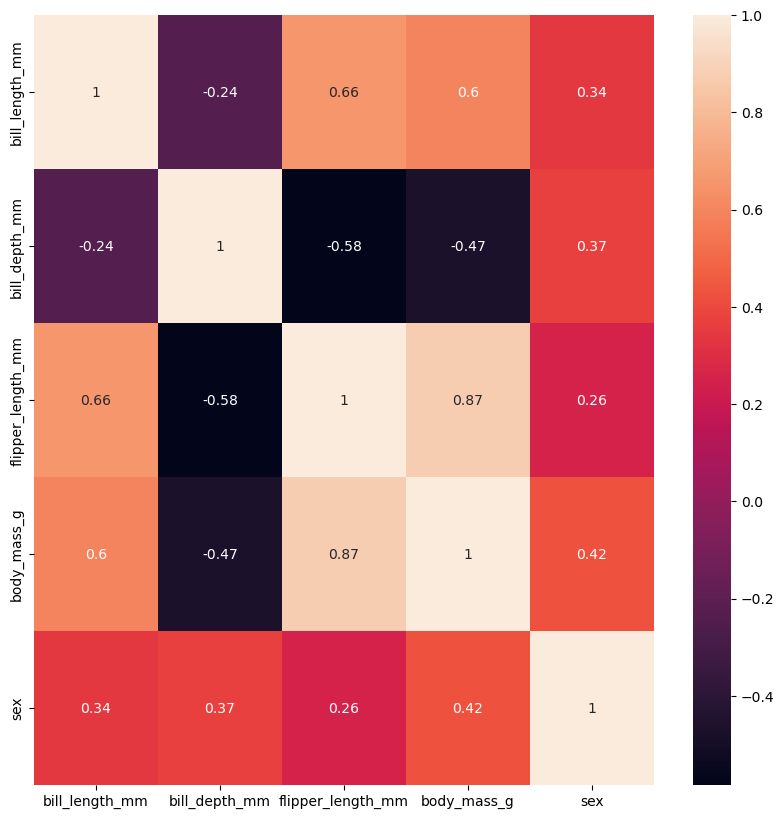

In [24]:
plot_correlation_matrix(df)

In [32]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0.0


In [33]:
df.drop("flipper_length_mm",axis=1).head()

,species,island,bill_length_mm,bill_depth_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,3750.0,1.0
1,Adelie,Torgersen,39.5,17.4,3800.0,0.0
2,Adelie,Torgersen,40.3,18.0,3250.0,0.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,3450.0,0.0
